## Лабораторная работа №3
#### Дорохин Андрей 221-361

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Test MSE с учетом шума: 0.0385
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


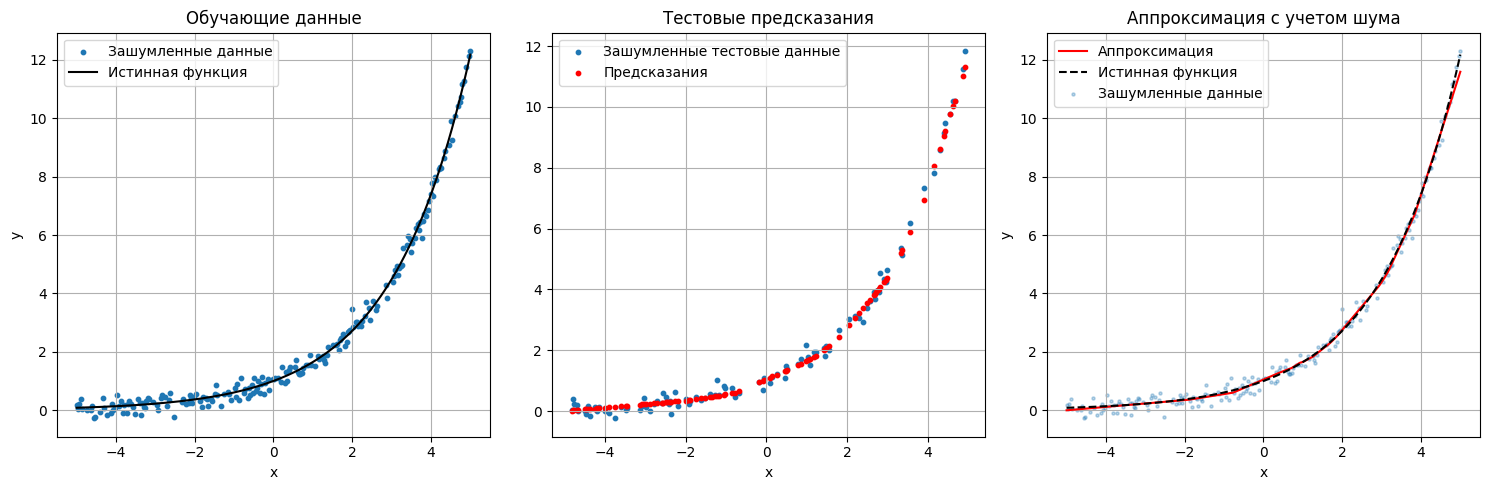

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Генерация данных с шумом
np.random.seed(42)
x = np.linspace(-5, 5, 300).reshape(-1, 1)
y = np.exp(x / 2)

# Добавление гауссовского шума
noise_std = 0.2  # Уровень шума
y_noisy = y + np.random.normal(0, noise_std, y.shape)

# Разделение на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y_noisy, test_size=0.33, random_state=42)

# Нормализация данных
scaler_x = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Создание модели
model = Sequential([
    Input(shape=(1,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Обучение модели
history = model.fit(
    x_train_scaled,
    y_train_scaled,
    epochs=800,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# 5. Предсказание и обратное преобразование
y_pred_scaled = model.predict(x_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# 6. Оценка качества
mse = np.mean((y_pred - y_test) ** 2)
print(f"Test MSE с учетом шума: {mse:.4f}")

# 7. Визуализация
plt.figure(figsize=(15, 5))

# Исходные данные с шумом
plt.subplot(1, 3, 1)
plt.scatter(x_train, y_train, s=10, label='Зашумленные данные')
plt.plot(x, y, c='black', label='Истинная функция')
plt.title('Обучающие данные')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

# Предсказания vs Зашумленные данные
plt.subplot(1, 3, 2)
plt.scatter(x_test, y_test, s=10, label='Зашумленные тестовые данные')
plt.scatter(x_test, y_pred, s=10, c='r', label='Предсказания')
plt.title('Тестовые предсказания')
plt.xlabel('x')
plt.grid(True)
plt.legend()

# Аппроксимация с учетом шума
plt.subplot(1, 3, 3)
x_plot = np.linspace(-5, 5, 300).reshape(-1, 1)
y_plot = model.predict(scaler_x.transform(x_plot))
y_plot = scaler_y.inverse_transform(y_plot)
plt.plot(x_plot, y_plot, 'r-', label='Аппроксимация')
plt.plot(x, y, 'k--', label='Истинная функция')
plt.scatter(x_train, y_train, s=5, alpha=0.3, label='Зашумленные данные')
plt.title('Аппроксимация с учетом шума')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()